# Замечание

Для использования модуля `interpolation`, вычисляющего ответы, необходимо установить библиотеки `numpy`, `tabulate` и `matplotlib`.
Это можно сделать с помощью команды:
```python
pip install numpy tabulate matplotlib

```

# Интерполяция функции одной переменной

Простейшая задача интерполирования заключается в следующем. 

На отрезке $[a, b]$ заданы $n + 1$ точки $x_0, x_1, x_2, …, x_n$, которые называют **узлами интерполяции**, и значения некоторой функции $f(x)$ в этих точках $f(x_0) = y_0, f(x_1) = y_1, f(x_2) = y_2, … f(x_n) = y_n$.

Требуется построить интерполирующую функцию $F(x)$, принадлежащую известному классу и принимающую в узлах интерполяции те же значения, что и $f(x)$:
$$F(x_0) = y_0, F(x_1) = y_1, F(x_2) = y_2, … F(x_n) = y_n.$$

Геометрически это означает, что нужно найти кривую $y = F(x)$ определенного типа, проходящую через заданную систему точек $M_i(x_i, y_i)$ $(i = 0,
1, 2, …, n)$.

<img src="https://studfile.net/html/1438/356/html_mbpf7OplPq.NZip/img-MEXoyq.png" width="500" align="center">

В такой общей постановке задача может иметь бесчисленное множество решений или совсем не иметь решений. Однако эта задача становится однозначной, если вместо произвольной функции $F(x)$ искать полином $P_n(x)$ степени $n$ такой, что
$$P_n(x_0) = y_0, P_n(x_1) = y_1, P_n(x_2) = y_2, … P_n(x_n) = y_n.$$
Полученную интерполяционную формулу $y = F(x)$ обычно используют для приближенного вычисления значений данной функции $f(x)$ для значений аргумента $x$, отличных от узлов интерполирования. Такая операция называется **интерполированием функции $f(x)$**.

## Интерполяция кубическими сплайнами

Чтобы определить кубический сплайн, рассмотрим отрезок $ [a, b] $ и построим сетку с числом участков $ n $ и узлами $ x_i , i = 0,...n $ (всего $ n + 1 $ узлов). Считаем, что граничные узлы сетки совпадают с границами отрезка: $x_0 = a, x_n = b$, все узлы различны и упорядочены $x_0 < ... < x_n$.

Отрезки вида $ [x_{i-1}, x_i], i = 1,...,n $ называем **участками сетки**.

Длина каждого участка задана положительным числом $h_i = x_i - x_{i-1}, i = 1,...,n$. Т.е. $h_i$ - это **шаг сетки** с номером $i$.

Если длины всех участков одинаковы, сетка называется **равномерной**. Тогда $h = \frac{b - a}{n}$. Число $h$ есть шаг равномерной сетки.

**Кубическим сплайном** на сетке $x_i, i = 0,\ldots,n$ отрезка $[a, b]$ называют функцию $S(x)$, дважды непрерывно-дифференцируемую на отрезке и представляющую собой полином степени не выше 3 на каждом его участке.
$i$.

На отрезке $ [x_{i-1}, x_i]$ кубический сплайн $S(x)$ задан формулой $S_i(x)$, которая определяет полином степени не выше 3 и действует только на данном участке. В описании полинома используется $x_i$, т.е. правая граница участка. В общем виде полином можно представить следующим образом:

$$ S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad x \in [x_{i-1},x_i] $$

Получаем $n$ отрезков, на каждом из которых задан полином 3 степени (каждый имеет 4 коэффициента). Тогда,ч тобы задать на сетке $ x_i , i = 0,...n $ отрезка $ [a, b] $ кубический сплайн, необходимо указать $4n$ коэффициентов $a_i, b_i, c_i, d_i, i=1,..., n$, так, чтобы получаемая функция была дважды непрерывно-дифференцируемой.$

### 1. Интерполяция кубическим сплайном (1 вариант)

Рассмотрим функцию $y(x)$, заданную на отрезке $ [a, b] $ в узлах $a=x_0<...<x_n=b$ значениями $y_0,...y_n$.

Кубический сплайн $S(x)$, заданный на сетке $ x_i , i = 0,...n $ отрезка $ [a, b] $, **интерполирует** функцию $y(x)$, если в узлах сетки значения сплайна и функции совпадают:

$$ S(x_i)=y(x_i), i=0,...,n $$

Кубическим сплайном, интерполирующим на отрезке $ [a, b] $ данную функцию $y(x)$, называется функция 

$$ S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad x \in [x_{i-1},x_i], \quad \quad (1.1) $$

удовлетворяющая следующим условиям:

1) Функция $ S(x) $ - дважды непрерывно-дифференцируемая
2) $ S_i(x_{i-1}) = y_{i-1}, \quad S_i(x_i) = y_i $ (условие интерполяции в узлах сплайна)
3) На концах интервала $ [a, b] $ должны выполняться граничные условия $ S_1''(a)=\gamma_0, \quad S_n''(b)=\gamma_1 $.

Рассмотрим подробнее каждое из условий, учитывая, что нам надо определить $4n$ коэффициентов сплайна.



#### Дважды непрерывно-дифференцируемость

В каждом внутреннем узле $x_i$, т.е. при $i=1,...,n-1$, значение $S(x)$ определяется одновременно двумя формулами:

* формулой $S_i(x)$, потому что $x_i$ есть правая граница участка $ [x_{i-1}, x_i]$.

* формулой $S_{i+1}(x)$, потому что $x_i$ есть правая граница участка $ [x_i, x_{i+1}]$.

Чтобы сплайн был дважды непрерывно-дифференцируем, нужно, чтобы для каждого внутреннего узла  $x_i, i=1,...,n-1$  совпадали значения двух соседних звеньев сплайна, а также их первые и вторые производные:

$$ S_i(x_i)=S_{i+1}(x_i), $$ 
$$ S_i'(x_i)=S_{i+1}'(x_i), $$
$$ S_i''(x_i)=S_{i+1}''(x_i), $$
$$ i=1,...,n-1 $$

Получим $3(n-1)$ условий. Выпишем первую и вторую производную функции $S(x)$:

$$ S_i'(x) = b_i + 2c_i(x-x_i) + 3d_i(x-x_i)^2, $$
$$ S_i''(x) = 2c_i + 6d_i(x-x_i) $$

Перепишем условия:

$$ a_i = a_{i+1} + b_{i+1}(x_i-x_{i+1}) + c_{i+1}(x_i-x_{i+1})^2 + d_{i+1}(x_i-x_{i+1})^3, $$
$$ b_i = b_{i+1} + 2c_{i+1}(x_i-x_{i+1}) + 3d_{i+1}(x_i-x_{i+1})^2, $$
$$ 2c_i = 2c_{i+1} + 6d_{i+1}(x_i-x_{i+1}), $$
$$ i=1,...,n-1 $$

Т.к. $h_{i+1} = x_{i+1} - x_i$, то:

$$ \mathbf{a_i = a_{i+1} - b_{i+1}h_{i+1} + c_{i+1}h_{i+1}^2 - d_{i+1}h_{i+1}^3 }, \quad \quad (1.2)  $$
$$ \mathbf{b_i = b_{i+1} - 2c_{i+1}h_{i+1} + 3d_{i+1}h_{i+1}^2 }, \quad \quad (1.3)  $$
$$ \mathbf{c_i = c_{i+1} - 3d_{i+1}h_{i+1} }, \quad \quad (1.4)  $$
$$ i=1,...,n-1 $$

#### Условия интерполяции


В каждом из $n+1$ узлов должны совпадать значение сплайна $S(x)$ и интерполируемой функции $y(x): \quad S(x_i) = y(x_i) $. Это $n+1$ условие. Для индексов $ i = 1, ..., n$ сплайн в точке $x_i$ можно вычислить по формуле $S_i(x)$, поэтому можно переписать:

$$ S_i(x_i) = y(x_i), \quad i = 1, ..., n $$

Это означает, что:

$$ \mathbf{a_i = y_i, \quad i = 1, ..., n} \quad \quad (1.5) $$

Для индекса $i=0$, т.е. для узла $x_0=a$ нужно использовать сплайн $S_1(x)$. Тогда условие интерполяции:

$$ S_1(x_0) = y(x_0) $$

$$ a_1 + b_1(x_0-x_1) + c_1(x_0-x_1)^2 + d_1(x_0-x_1)^3 = y(x_0) $$

С учетом, что $ h_1 = x_1 - x_0 $, получим:

$$ \mathbf{a_1 - b_1h_1 + c_1h_1^2 - d_1h_1^3 = y_0} \quad \quad (1.6)$$

#### Граничные условия

Ранее были описаны $3n-3$ условия дважды непрерывно-дифференцируемости и $n+1$ условие интерполяции, т.е. всего $4n-2$. А коэффициентов нужно найти $4n$ штук. В качестве двух недостающих условий выступят граничные условия:
$$ S_1''(a)=\gamma_0, $$
$$ S_n''(b)=\gamma_1 $$

Для левой границы $a=x_0$:
$$ S_1''(x_0)=\gamma_0, $$
$$ 2c_1 + 6d_1(x_0-x_1) = \gamma_0, $$
$$ \mathbf{2c_1 - 6d_1h_1 = \gamma_0 }, \quad \quad (1.7)$$

Для правой границы $b=x_n$:
$$ S_n''(x_n)=\gamma_1, $$
$$ \mathbf{2c_n = \gamma_1} , \quad \quad (1.8)$$

#### Составление системы уранений

По итогу из (1.2)-(1.8) получаем $4n$ неизвестных и $4n$ уравнений для поиска этих неизвестных.

$$\left\{\begin{array}{l}
a_i = a_{i+1} - b_{i+1}h_{i+1} + c_{i+1}h_{i+1}^2 - d_{i+1}h_{i+1}^3 , \quad i=1,...,n-1 \\
b_i = b_{i+1} - 2c_{i+1}h_{i+1} + 3d_{i+1}h_{i+1}^2 , \quad i=1,...,n-1 \\
c_i = c_{i+1} - 3d_{i+1}h_{i+1} , \quad i=1,...,n-1 \\
a_i = y_i, \quad i = 1, ..., n \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad (*) \\
a_1 - b_1h_1 + c_1h_1^2 - d_1h_1^3 = y_0 \\
2c_1 - 6d_1h_1 = \gamma_0 \\
2c_n = \gamma_1
\end{array}\right.$$

Произведем преобразования, чтобы составить систему уравнений.

Выпишем формулы (1.4), (1.7) и (1.8):
$$ c_i = c_{i+1} - 3d_{i+1}h_{i+1} , \quad i=1,...,n-1 $$
$$ 2c_1 - 6d_1h_1 = \gamma_0 , $$
$$ 2c_n = \gamma_1.$$

Введя фиктивную переменную $c_0 = \frac{\gamma_0}{2}$ (т.к. она не используется), можно привести данные формулы к единой записи:

$$ c_0 = \frac{\gamma_0}{2} $$
$$ c_0 = c_1 - 3d_1h_1, $$
$$ c_1 = c_2 - 3d_2h_2, $$
$$ ... $$
$$ c_{n-1} = c_n - 3d_nh_n, $$
$$ c_n = \frac{\gamma_1}{2} $$

Из этих формул можно вывести формулу для вычисления $d_i$:
$$ d_i = \frac{c_i-c_{i-1}}{3h_i}, \quad i=1,...,n \quad \quad (1.9) $$

Подставим во вторую формулу из системы (*) и получим:
$$ b_i = b_{i+1} - 2c_{i+1}h_{i+1} + 3d_{i+1}h_{i+1}^2 = b_{i+1} - 2c_{i+1}h_{i+1} + 3\frac{c_{i+1}-c_i}{3h_{i+1}}h_{i+1}^2 = b_{i+1} - (c_{i+1}+c_i)h_{i+1}, \quad i=1,...,n-1  \quad \quad (1.10) $$


Выпишем формулы (1.2), (1.5) и (1.6):
$$ a_i = a_{i+1} - b_{i+1}h_{i+1} + c_{i+1}h_{i+1}^2 - d_{i+1}h_{i+1}^3 , \quad i=1,...,n-1$$
$$ a_i = y_i, \quad i = 1, ..., n $$
$$ a_1 - b_1h_1 + c_1h_1^2 - d_1h_1^3 = y_0 $$

Опираясь на вторую формулу из данных, заменим в двух других формулах $a_i$ на $y_i$, также заменим $d_i$:
$$ y_i = y_{i+1} - b_{i+1}h_{i+1} + c_{i+1}h_{i+1}^2 - \frac{c_{i+1}-c_i}{3h_{i+1}}h_{i+1}^3 , \quad i=1,...,n-1$$
$$ y_1 - b_1h_1 + c_1h_1^2 - \frac{c_1-c_0}{3h_1}h_1^3 = y_0 $$

Можно привести записанные равенства к одному виду:
$$ y_i = y_{i+1} - b_{i+1}h_{i+1} + \frac{2}{3}c_{i+1}h_{i+1}^2 + \frac{1}{3}c_ih_{i+1}^2, \quad i=0,...,n-1 $$

Преобразуем:
$$ b_{i+1}h_{i+1} = y_{i+1} - y_i + \frac{2}{3}c_{i+1}h_{i+1}^2 + \frac{1}{3}c_ih_{i+1}^2, \quad i=0,...,n-1 $$
$$ b_{i+1} = \frac{y_{i+1} - y_i}{h_{i+1}} + \frac{2}{3}c_{i+1}h_{i+1} + \frac{1}{3}c_ih_{i+1}, \quad i=0,...,n-1 \quad\quad (1.11)$$

Подставим такое представление $b_i$ в формулу (1.10):
$$ (c_{i+1}+c_i)h_{i+1} = b_{i+1} - b_i, \quad i=1,...,n-1 $$
$$ (c_{i+1}+c_i)h_{i+1} = \left(\frac{y_{i+1} - y_i}{h_{i+1}} + \frac{2}{3}c_{i+1}h_{i+1} + \frac{1}{3}c_ih_{i+1}\right) - \left(\frac{y_{i} - y_{i-1}}{h_{i}} + \frac{2}{3}c_{i}h_{i} + \frac{1}{3}c_{i-1}h_{i}\right), \quad i=1,...,n-1 $$
$$ (c_{i+1}+c_i)h_{i+1} -  \left(\frac{2}{3}c_{i+1}h_{i+1} + \frac{1}{3}c_ih_{i+1}\right) + \left(\frac{2}{3}c_{i}h_{i} + \frac{1}{3}c_{i-1}h_{i}\right) =  \frac{y_{i+1} - y_i}{h_{i+1}} - \frac{y_{i} - y_{i-1}}{h_{i}}, \quad i=1,...,n-1 $$
$$ c_{i+1}\left(h_{i+1} - \frac{2}{3}h_{i+1}\right) + c_i\left(h_{i+1} - \frac{1}{3}h_{i+1} + \frac{2}{3}h_i\right) + c_{i-1}\frac{1}{3}h_i =  \frac{y_{i+1} - y_i}{h_{i+1}} - \frac{y_{i} - y_{i-1}}{h_{i}}, \quad i=1,...,n-1 $$
$$ c_{i+1}\frac{1}{3}h_{i+1} + c_i\left(\frac{2}{3}h_{i+1} + \frac{2}{3}h_i\right) + c_{i-1}\frac{1}{3}h_i =  \frac{y_{i+1} - y_i}{h_{i+1}} - \frac{y_{i} - y_{i-1}}{h_{i}}, \quad i=1,...,n-1 $$
$$ c_{i+1}h_{i+1} + 2c_i(h_{i+1} + h_i) + c_{i-1}h_i =  3\left(\frac{y_{i+1} - y_i}{h_{i+1}} - \frac{y_{i} - y_{i-1}}{h_{i}}\right), \quad i=1,...,n-1 $$

Добавим уравнения для нахождения $c_0$ и $c_n$ и получим СЛАУ для поиска коэффициентов сплайна:
$$\left\{\begin{array}{l}
c_0 = \frac{\gamma_0}{2} \\
c_{i+1}h_{i+1} + 2c_i(h_{i+1} + h_i) + c_{i-1}h_i =  3\left(\frac{y_{i+1} - y_i}{h_{i+1}} - \frac{y_{i} - y_{i-1}}{h_{i}}\right), \quad i=1,...,n-1 \\
c_n = \frac{\gamma_1}{2}
\end{array}\right.
$$
где $h_i = x_i - x_{i-1}$.

Полученная матрица является трехдиагональной. СЛАУ может быть решена методом прогонки.
$$\left(\begin{array}{l}
1 & 0 & 0 & 0 & ... & 0 & 0 & 0 & 0 \\
h_1 & 2(h_1+h_2) & h_2 & 0 & ... & 0 & 0 & 0 & 0  \\
0 & h_2 & 2(h_2+h_3) & h_3 & ... & 0 & 0 & 0 & 0  \\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & 0 & ... & h_{n-2} & 2(h_{n-2}+h_{n-1}) & h_{n-1} & 0 \\
0 & 0 & 0 & 0 & ... & 0 & h_{n-1} & 2(h_{n-1}+h_n) & h_n \\
0 & 0 & 0 & 0 & ... & 0 & 0 & 0 & 1
\end{array}\right)
\left(\begin{array}{l}
\frac{\gamma_0}{2} \\
3\left(\frac{y_2-y_1}{h_2} - \frac{y_1-y_0}{h_1}\right) \\
3\left(\frac{y_3-y_2}{h_3} - \frac{y_2-y_1}{h_2}\right) \\
... \\
3\left(\frac{y_{n-1}-y_{n-2}}{h_{n-1}} - \frac{y_{n-2}-y_{n-3}}{h_{n-2}}\right)  \\
3\left(\frac{y_n-y_{n-1}}{h_{n}} - \frac{y_{n-1}-y_{n-2}}{h_{n-1}}\right) \\
\frac{\gamma_1}{2}
\end{array}\right)
$$

### 2. Интерполяция кубическим сплайном (2 вариант)

Рассмотрим функцию $y(x)$, заданную на отрезке $ [a, b] $ в узлах $a=x_0<...<x_n=b$ значениями $y_0,...y_n$.

Кубический сплайн $S(x)$, заданный на сетке $ x_i , i = 0,...n $ отрезка $ [a, b] $, **интерполирует** функцию $y(x)$, если в узлах сетки значения сплайна и функции совпадают:

$$ S(x_i)=y(x_i), i=0,...,n $$

Как было написано выше, чтобы задать на сетке $ x_i , i = 0,...n $ отрезка $ [a, b] $ кубический сплайн, необходимо указать $4n$ коэффициентов. Для их нахождения нужно составить $4n$ условий.

В каждом узле $x_i, i = 0,...n $ должно выполняться условие интерполяции $S(x_i)=y(x_i)$, причем для внутренних узлов это условие должно выполняться дважды. Это связано с тем, что каждый внутренний узел $x_i, i = 1,...n-1 $ является одновременно правой границей участка $[x_{i-1},x_i]$ и левой границей участка $[x_i,x_{i+1}]$, на кажом из которых свой полином. Соответственно для внутренних узлов $x_i, i = 1,...n-1 $ по 2 условия: 
$$ S_i(x_i)=y_i, $$
$$ S_{i+1}(x_i)=y_i$$
И ещё по одному для граничных узлов $a=x_0$ и $b=x_n$:
$$ S_1(x_0)=y_0, $$
$$ S_n(x_n)=y_n $$

Получается $2(n-1)+2=2n$ условий.

Помимо этого, во внутренних узлах должны быть непрерывны первые и вторые производные. Это ещё $2(n-1)$ условие. В сумме $4n-2$ условия. В качестве двух оставшихся будут граничные условия общего вида:

$$\left\{\begin{array}{ll}
\alpha_0 S'(x_0) + \beta_0 S''(x_0) = \gamma_0, \\
\alpha_1 S'(x_n) + \beta_1 S''(x_n) = \gamma_1, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

### Составление функции сплайна

Отойдем от общего вида кубического сплайна и попробуем самостоятельно построить его так, чтобы он удовлетворял описанным выше условиям. Обозначим:
$$ m_i = S''(x_i), \quad i=0,...,n \quad\quad (2.1) $$

Тогда на отрезке $[x_{i-1},x_i]$:

$$ S''(x) = m_i\frac{x-x_{i-1}}{x_i-x_{i-1}} + m_{i-1}\frac{x-x_i}{x_{i-1}-x_i} $$

Данное уравнение задает прямую, проходящую через 2 точки. Благодаря такому обозначению автоматически выполняется непрерывность вторых производных во внутренних узлах ($n-1$ условие выполнено).
Проинтегрируем дважды, учитывая, что $h_i=x_i-x_{i-1}$:

$$ \int S''(x)dx = \frac{m_i}{2}\frac{(x-x_{i-1})^2}{h_i} - \frac{m_{i-1}}{2}\frac{(x-x_i)^2}{h_i} + C_1 = S'(x) $$
$$ \int S'(x)dx = \frac{m_i}{6}\frac{(x-x_{i-1})^3}{h_i} - \frac{m_{i-1}}{6}\frac{(x-x_i)^3}{h_i} + C_1x + C_2 = S(x) $$

На концах каждого из отрезков $[x_{i-1},x_i]$ сплайн должен принимать такие же значения, как функция $y(x)$, т.е. $S(x_i)=y_i$ (условие интерполяции). Исходя из этого, подберем коэффициенты $C_1$ и $C_2$. Получим:

$$ S(x) = m_{i-1}\frac{(x_i-x)^3}{6h_i} + m_i\frac{(x-x_{i-1})^3}{6h_i} + \left(y_{i-1} - \frac{m_{i-1}h_i^2}{6}\right)\frac{x_i-x}{h_i} + \left(y_i - \frac{m_ih_i^2}{6}\right)\frac{x-x_{i-1}}{h_i}, \quad x \in [x_{i-1},x_i] \quad\quad (2.2)$$

Таких отрезков $n$ штук, на каждом проверяется 2 условия (в левой и правой границе). Это $2n$ штук, в сумме уже $3n-1$.

Для поиска неизвестных $m_i$ выпишем условия непрерывности первых производных во внутренних узлах. Для этого продифференцируем $S(x)$:

$$ S'(x) = \frac{m_{i-1}(x_i-x)^2}{2h_i} + \frac{m_i(x-x_{i-1})^2}{2h_i} - \frac{y_{i-1}}{h_i} + \frac{m_{i-1}h_i}{6} + \frac{y_i}{h_i} - \frac{m_ih_i}{6}, \quad x \in [x_{i-1},x_i] \quad\quad (2.3)$$

Будем рассматривать сплайн в точке $x_i$ на стыке отрезков $[x_{i-1},x_i]$ и $[x_i,x_{i+1}]$:

$$ S_i'(x_i)=S_{i+1}'(x_i)$$
$$ \frac{m_ih_i}{2} - \frac{y_{i-1}}{h_i} + \frac{m_{i-1}h_i}{6} + \frac{y_i}{h_i} - \frac{m_ih_i}{6} = \frac{m_ih_{i+1}}{2} - \frac{y_i}{h_{i+1}} + \frac{m_ih_{i+1}}{6} + \frac{y_{i+1}}{h_{i+1}} - \frac{m_{i+1}h_{i+1}}{6} $$
$$ \frac{m_ih_i}{2} - \frac{m_ih_i}{6} - \frac{m_ih_{i+1}}{2} - \frac{m_ih_{i+1}}{6} + \frac{m_{i-1}h_i}{6} + \frac{m_{i+1}h_{i+1}}{6} = \frac{y_{i-1}}{h_i} - \frac{y_i}{h_i} + \frac{y_{i+1}}{h_{i+1}} - \frac{y_i}{h_{i+1}} $$
$$ \frac{m_ih_i}{3} - \frac{m_ih_{i+1}}{3} + \frac{m_{i-1}h_i}{6} + \frac{m_{i+1}h_{i+1}}{6} = \frac{y_{i+1}-y_i}{h_{i+1}} - \frac{y_i-y_{i-1}}{h_i} $$
$$ m_{i-1}\frac{h_i}{6} + m_i\frac{h_i-h_{i+1}}{3} + m_{i+1}\frac{h_{i+1}}{6} = \frac{y_{i+1}-y_i}{h_{i+1}} - \frac{y_i-y_{i-1}}{h_i} \quad\quad (2.4)$$

Т.к. "склеивание" первых производных нужно только во внутренних узлах, то получается $n-1$ уравнение. Итого уже $4n-2$ условий учтено.

Остались граничные условия. Преобразуем их, используя формулы (2.1) и (2.3).

$$\left\{\begin{array}{ll}
\alpha_0 S'(x_0) + \beta_0 S''(x_0) = \gamma_0, \\
\alpha_1 S'(x_n) + \beta_1 S''(x_n) = \gamma_1, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

$$\left\{\begin{array}{ll}
\alpha_0 \left(\frac{m_0}{2}h_1 - \frac{f_0}{h_1} + \frac{m_0h_1}{6} + \frac{f_1}{h_1} - \frac{m_1h_1}{6} \right) + \beta_0 m_0 = \gamma_0, \\
\alpha_1 \left(\frac{m_n}{2}h_n - \frac{f_{n-1}}{h_n} + \frac{m_{n-1}h_n}{6} + \frac{f_n}{h_n} - \frac{m_nh_n}{6} \right) + \beta_1 m_n = \gamma_1, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

$$\left\{\begin{array}{ll}
 m_0 \left(- \alpha_0\frac{h_1}{2} + \alpha_0\frac{h_1}{6} + \beta_0\right) - m_1\alpha_0\frac{h_1}{6} = \gamma_0 - \alpha_0\frac{y_1-y_0}{h_1}, \\
m_{n-1}\alpha_1\frac{h_n}{6} + m_n\left(\alpha_1\frac{h_n}{2} - \alpha_1\frac{h_n}{6} + \beta_1 \right)= \gamma_1 - \alpha_1\frac{y_n-y_{n-1}}{h_n}, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

$$\left\{\begin{array}{ll}
 m_0 \left(- \alpha_0\frac{h_1}{3} + \beta_0\right) - m_1\alpha_0\frac{h_1}{6} = \gamma_0 - \alpha_0\frac{y_1-y_0}{h_1}, \\
m_{n-1}\alpha_1\frac{h_n}{6} + m_n\left(\alpha_1\frac{h_n}{3} + \beta_1 \right)= \gamma_1 - \alpha_1\frac{y_n-y_{n-1}}{h_n}, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

Добавив эти граничные условия к (2.4), получаем СЛАУ, которую можно решить методом прогонки для нахождения коэффициентов $m_i, i=0,...,n $.

$$\left\{\begin{array}{ll}
m_0 \left(- \alpha_0\frac{h_1}{3} + \beta_0\right) - m_1\alpha_0\frac{h_1}{6} = \gamma_0 - \alpha_0\frac{y_1-y_0}{h_1}, \\
m_{i-1}\frac{h_i}{6} + m_i\frac{h_i-h_{i+1}}{3} + m_{i+1}\frac{h_{i+1}}{6} = \frac{y_{i+1}-y_i}{h_{i+1}} - \frac{y_i-y_{i-1}}{h_i}, \quad i=1,...,n-1 \\
m_{n-1}\alpha_1\frac{h_n}{6} + m_n\left(\alpha_1\frac{h_n}{3} + \beta_1 \right)= \gamma_1 - \alpha_1\frac{y_n-y_{n-1}}{h_n}, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

### 3. Метод прогонки

Метод прогонки является частным случаем метода Гаусса и применяется для решения систем линейных уравнений с трёхдиагональной матрицей.

$$\left\{\begin{array}{l}
b_0x_0 + c_0x_0 = d_0 \\
a_ix_i + b_ix_i + c_ix_i = d_i, \quad i=1,...,n-1 \\
a_nx_n + b_nx_n = d_n
\end{array}\right.
$$

**Трехдиагональная матрица** - матрица такого вида, где во всех остальных местах, кроме главной диагонали и двух соседних с ней, стоят нули.

$$\left(\begin{array}{l}
b_0 & c_0 & 0 & 0 & ... & 0 & 0 & 0 & 0 \\
a_1 & b_1 & c_1 & 0 & ... & 0 & 0 & 0 & 0  \\
0 & a_2 & b_2 & c_3 & ... & 0 & 0 & 0 & 0  \\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & 0 & ... & a_{n-2} & b_{n-2} & c_{n-2} & 0 \\
0 & 0 & 0 & 0 & ... & 0 & a_{n-1} & b_{n-1} & c_{n-1} \\
0 & 0 & 0 & 0 & ... & 0 & 0 & a_n & b_n
\end{array}\right)
$$

Метод прогонки состоит из двух этапов: 
1. Прямая прогонка: определение прогоночных коэффициентов.
2. Обратная прогонка: нахождение неизвестных $x_i$

#### Прямая прогонка

На этом этапе вычисляются прогоночные коэффициенты $p_i$ и $q_i$, $i=0,..,n$ по формулам:

$$ r_0 = b_0, \quad p_0 = \frac{-c_0}{y_0}, \quad q_0 = \frac{d_0}{y_0} $$
$$ r_i = b_i+a_ip_{i-1}, \quad p_i = \frac{-c_i}{r_i}, \quad q_i = \frac{d_i-a_iq_{i-1}}{r_i}, \quad i=1,...,n $$
$$ r_n = b_n+a_np_{n-1}, \quad q_n = \frac{d_n-a_nq_{n-1}}{r_n}$$

#### Обратная прогонка

Вычисляются неизвестные $x_i$ по формулам:
$$ x_n = q_n $$
$$ x_i = p_ix_{i+1} + q_i, \quad i=n-1,...,0 $$

Стоит обратить внимание, что вычисления проводятся по убыванию значения $i$.

### Алгоритм расчета коэффициентов кубического сплайна

#### 1 вариант

1. Ввод значений сеточной функции $y(x)$ - массивов $x$ и $y$.
2. Поиск прогоночных коэффициентов $p_i$ и $q_i$, $i=0,...,n$, с помощью прямой прогонки.
3. Поиск коэффициентов сплайна $c_i, i=0,...,n$ с помощью обратной прогонки.
4. Поиск коэффициентов сплайна $b_i, i=0,...,n$ по формуле (1.11).
5. Поиск коэффициентов сплайна $d_i, i=0,...,n$ по формуле (1.9).

Найденные коэффициенты позволят вычислить значение сплайна в заданной точке $x$ по формуле (1.1).

#### 2 вариант

1. Ввод значений сеточной функции $y(x)$ - массивов $x$ и $y$.
2. Поиск прогоночных коэффициентов $p_i$ и $q_i$, $i=0,...,n$, с помощью прямой прогонки.
3. Поиск коэффициентов сплайна $m_i, i=0,...,n$ с помощью обратной прогонки.

Найденные коэффициенты $m_i$ позволят вычислить значение сплайна в заданной точке $x$ по формуле (2.2).

### Задание

В результате эксперимента была определена некоторая табличная зависимость $y(x)$:

| x | -3 | 0 | 1 | 2 | 4 |
|---|----|---|---|---|---|
| y | -27| 0 | 1 | 8 | 64|

Построить интерполяционный кубический сплайн с краевыми условиями:

1) $\left\{\begin{array}{ll}
S''(-3) = -18, \\
S''(4) = 24, 
\end{array}\right. $

2) $\left\{\begin{array}{ll}
S'(-3) = 27, \\
2S'(4) + 0.5S''(4) = 108, 
\end{array}\right. $

Вычислить ожидаемое значение функции в указанных точках $t_i $ $(t_0 = -1, t_1 = -2, t_2 = 2.5)$. Построить график, на котором изобразить эксперементальные точки, график интерполяционной зависимости, ожидаемые значения в указанных точках.

Задачу решить для 2-х вариантов краевых условий. 

Представить результаты работы программ на тестовых данных и данных по своему варианту.

In [4]:
### Решение






### Ответы

Для получения ответов необходимо задать:
1. Значения сеточной функции $y(x)$ (массивы `x` и `y`).
2. Значения коэффициентов в граничных условиях (массивы `alpha`, `betta` и `gamma`).
3. Значения точек, в которых нужно вычислить значение сплайна (массив `t`).
4. Команду для запуска исполняемого файла (`path = "./interpolation_exe"`).

В 1-м варианте граничные условия выглядят так:
$$\left\{\begin{array}{ll}
S''(x_0) = \gamma_0, \\
S''(x_n) = \gamma_1, 
\end{array}\right. $$

Во 2-м варианте так:
$$\left\{\begin{array}{ll}
\alpha_0 S'(x_0) + \beta_0 S''(x_0) = \gamma_0, \\
\alpha_1 S'(x_n) + \beta_1 S''(x_n) = \gamma_1, 
\end{array}\right. $$
$$ \alpha_i^2+\beta_i^2>0, \quad i = 0,1 $$

Поэтому в обоих случаях обязательно нужно задать $\gamma_0$ и $\gamma_1$ (массив `gamma`), а во втором ещё и $\alpha_i, \beta_i, i = 0,1$ (массивы `alpha` и `betta`).

Пример заполнения данных для аппроксимации функции $x^3$ на отрезке $[-3,4]$:
```python
x = [-3, 0, 1, 2, 4]
y = [-27, 0, 1, 8, 64]
alpha = [0, 0]
betta = [1, 1]
gamma = [-18, 24]
t = [-1, -2, 2.5]
path = "./interpolation_exe"
```

Чтобы запустить пример решения, нужно импортировать модуль `interpolation`, например, так:
```python
import interpolation as inter
```
и выполнить команду:

```python
inter.cubic_spline_1(x, y, t, gamma, path) #для 1 варианта
```
```python
inter.cubic_spline_2(x, y, t, gamma, betta, alpha, path) #для 2 варианта
```

_______Интерполяция кубическими сплайнами (1 вариант)_______

+----------------+---------+---------+
|    Прогоночные |       p |       q |
|   коэффициенты |         |         |
|----------------+---------+---------|
|              0 |  0.0000 | -9.0000 |
|              1 | -0.1250 |  0.3750 |
|              2 | -0.2581 |  4.5484 |
|              3 | -0.3483 | 10.1798 |
|              4 |  0.0000 | 12.0000 |
+----------------+---------+---------+
Решение СЛАУ методом прогонки: 
c[0] =  -9.0000
c[1] =   0.0000
c[2] =   3.0000
c[3] =   6.0000
c[4] =  12.0000
+----------------+---------+---------+---------+--------+
|   Коэффициенты |       a |       b |       c |      d |
|        сплайна |         |         |         |        |
|----------------+---------+---------+---------+--------|
|              1 |  0.0000 |  0.0000 |  0.0000 | 1.0000 |
|              2 |  1.0000 |  3.0000 |  3.0000 | 1.0000 |
|              3 |  8.0000 | 12.0000 |  6.0000 | 1.0000 |
|              4 | 64.0000 | 4

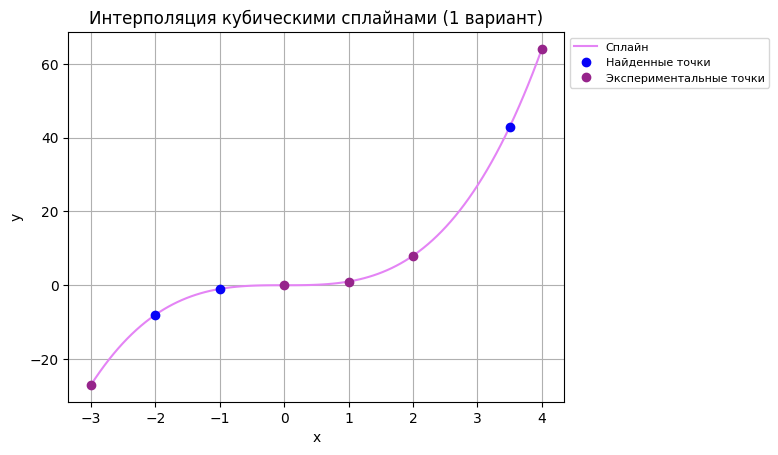

In [1]:
import interpolation as inter

### 1 вариант решения

x = [-3, 0, 1, 2, 4]
y = [-27, 0, 1, 8, 64]
gamma = [-18, 24]
t = [-1, -2, 3.5]
path = "./interpolation_exe"

inter.cubic_spline_1(x, y, t, gamma, path)


_______Интерполяция кубическими сплайнами (2 вариант)_______

+----------------+---------+----------+
|    Прогоночные |       p |        q |
|   коэффициенты |         |          |
|----------------+---------+----------|
|              0 | -0.5000 | -18.0000 |
|              1 | -0.1538 |   0.9231 |
|              2 | -0.2600 |   9.1200 |
|              3 | -0.3484 |  20.3624 |
|              4 |  0.0000 |  24.0000 |
+----------------+---------+----------+
Коэффициенты сплайна (решение СЛАУ): 
m[0] = -18.0000
m[1] =  -0.0000
m[2] =   6.0000
m[3] =  12.0000
m[4] =  24.0000

Значения сплайна в заданных точках:
S(-1.0) = -0.9999999999999998
S(-2.0) = -8.0
S(3.5) = 42.875


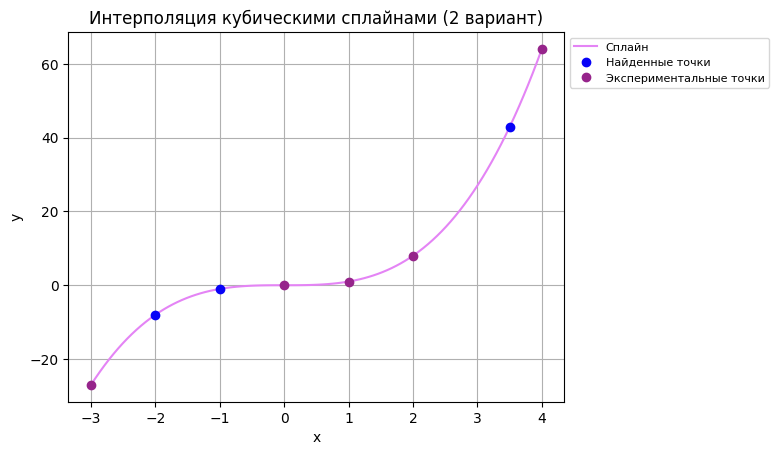

In [2]:
import interpolation as inter

### 1 вариант решения

x = [-3, 0, 1, 2, 4]
y = [-27, 0, 1, 8, 64]
alpha = [1, 2]
betta = [0, 0.5]
gamma = [27, 108]
t = [-1, -2, 3.5]
path = "./interpolation_exe"

inter.cubic_spline_2(x, y, t, gamma, betta, alpha, path)

# Интерполяция функции двух переменных

**Интерполяция** – в вычислительной математике способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений.
Рассмотрим систему несовпадающих точек $(x_i,y_i )$   $(i=1,…,n)$ из некоторой области $D$. Пусть значения функции $f$ известны только в этих точках:

$$z_i=f(x_i,y_i ),\quad i=1,…,n$$

Точки $(x_i,y_i )$ называют **узлами интерполяции**, а их совокупность – **интерполяционной сеткой**.

Тройки $(x_i,y_i,z_i )$ называют **точками данных** или базовыми точками.

Задача интерполяции состоит в поиске такой функции $F$ из заданного класса функций, что
1. $F(x_i,y_i )=z_i$, $i=1,…,n$;
2. $F(x,y)$ максимально приближает функцию $f(x,y)$ в произвольной точке $(x,y)$ внутри интерполяционной сетки.

Функцию $F(x)$ называют **интерполирующей функцией**.

Для решения поставленной задачи существуют такие методы, как:
1. Билинейная интерполяция;
2. Бикубическая интерполяция.

## Билинейная интерполяция

**Билинейная интерполяция** – в вычислительной математике – обобщение линейной интерполяции одной переменной для функций двух переменных.
Обобщение основано на применении обычной линейной интерполяции сначала в направлении одной из координат, а затем в перпендикулярном направлении.

Функция билинейной интерполяции имеет вид
$$F(x,y)=b_1+b_2 x+b_3 y+b_4 xy \quad\quad (3.1)$$

и интерполирует значения исходной функции двух переменных в произволь-ном прямоугольнике по четырём её значениям в вершинах прямоугольника и экстраполирует функцию на всю остальную поверхность.

### Принцип построения билинейной интерполяции

Допустим, что необходимо интерполировать значение функции $f(x,y)$ в точке $P=(x,y)$. Значения функции в окружающих точку $P$ точках $Q_{11}=(x_1,y_1)$, $Q_{12}=(x_1,y_2)$, $Q_{21}=(x_2,y_1)$ и $ Q_{22}=(x_2,y_2)$ известны.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/BilinearInterpolation.svg/519px-BilinearInterpolation.svg.png?20230630091617" width="280" align="center">

Билинейная интерполяция состоит из двух шагов. Сначала выполняется линейная интерполяция в направлении $X$:
$$f(R_1)≈\frac{x_2-x}{x_2-x_1}f(Q_{11} )+\frac{x-x_1}{x_2-x_1} f(Q_{21} )$$
$$f(R_2)≈\frac{x_2-x}{x_2-x_1}f(Q_{12} )+\frac{x-x_1}{x_2-x_1} f(Q_{22} )$$

где $R_1=(x, y_1)$, $R_2=(x,y_2 )$.

$f(R_1 )$ является результатом линейной интерполяции по оси $X$ между $Q_{11}$ и $Q_{21}$, а $f(R_2 )$ - по оси $X$ между $Q_{12}$ и $Q_{22}$.

На втором шаге выполняется интерполяция в направлении $Y$:

$$f(P)≈\frac{y_2-y}{y_2-y_1}f(R_1 )+\frac{y-y_1}{y_2-y_1} f(R_2 )$$

где $f(P)$ - результат линенйной интерполяции между $R_1$ и $R_2$.

Это и есть интерполируемое (экстраполируемое) значение функции $f(x,y)$, причём значения интерполирующей функции $F(x,y)$ равны значениям интерполируемой функции в исходных точках $(x_1,y_1 )$, $(x_1,y_2 )$, $(x_2,y_1 )$ и $(x_2,y_2 )$:

$$f(P)≈F(x,y)=\frac{f(Q_{11})}{(x_2-x_1)(y_2-y_1)}(x_2-x)(y_2-y) +\frac{f(Q_{21})}{(x_2-x_1)(y_2-y_1)}(x-x_1)(y_2-y)+ $$
$$+\frac{f(Q_{12})}{(x_2-x_1)(y_2-y_1)}(x_2-x)(y-y_1) +\frac{f(Q_{22})}{(x_2-x_1)(y_2-y_1)}(x-x_1)(y-y_1)$$


Другим эквивалентным способом неизвестные коэффициенты $b_1$, $b_2$, $b_3$ и $b_4$ интерполирующей функции (интерполянта) можно найти из решения системы линейных уравнений относительно коэффициентов интерполянта $F(x,y)=b_1+b_2 x+b_3 y+b_4 xy$:

$$f(Q_{11})=b_1+b_2 x_1+b_3 y_1+b_4 x_1 y_1 \quad\quad\quad\quad$$
$$f(Q_{12})=b_1+b_2 x_1+b_3 y_2+b_4 x_1 y_2 \quad\quad\quad\quad$$
$$f(Q_{21})=b_1+b_2 x_2+b_3 y_1+b_4 x_2 y_1 \quad\quad (3.2)$$
$$f(Q_{22})=b_1+b_2 x_2+b_3 y_2+b_4 x_2 y_2 \quad\quad\quad\quad$$



Результат билинейной интерполяции не зависит от порядка шагов по координатам. Возможно сначала интерполировать между заданными точками вдоль оси ординат и затем, получив два вспомогательных значения, интерполировать между ними вдоль оси абсцисс.

### Алгоритм

1. Ввести (считать с файла) значения сеточной функции $f(x,y)$  (массивы $x$, $y$ и $z$).
2. Для очередного сегмента $[x_i,x_{i+1}]×[y_j,y_{j+1}]$, $i=0,...,n-2, j=0,...,m-2$ составить систему линейных уравнений по формулам (3.2).
3. Решить полученную СЛАУ для нахождения коэффициентов $b_{ji1}, b_{ji2}, b_{ji3}$ и $b_{ji4}$.

Найденные коэффициенты $b_{jik}$ позволят вычислить значение функции в заданной точке $(x,y)$ по формуле (3.1).

### Задание

В результате эксперимента была определена некоторая табличная зависимость $f(x,y)$. В таблице ниже на пересечении $i$-й строки и $j$-го столбца находится значение функции $f(x_i,y_j)$.

| x / y | -10 | -8 | -6 | -4 | -2 | 0 | 2 | 4 | 6 | 8 | 10 | 12 | 14 | 16 |
|-----|-----|----|----|----|----|---|---|---|---|---|---|-----|----|----|
| -11 |-21 | -57 | -85 | -105 | -117 | -121 | -117 | -105 | -85 | -57 | -21 | 23 | 75 | 135 |
| -9  | 19 | -17 | -45 | -65 | -77 | -81 | -77 | -65 | -45 | -17 | 19 | 63 | 115 | 175 |
| -7| 51 | 15 | -13 | -33 | -45 | -49 | -45 | -33 | -13 | 15 | 51 | 95 | 147 | 207 |
| -5 | 75 | 39 | 11 | -9 | -21 | -25 | -21 | -9 | 11 | 39 | 75 | 119 | 171 | 231 |
| -3 | 91 | 55 | 27 | 7 | -5 | -9 | -5 | 7 | 27 | 55 | 91 | 135 | 187 | 247 |
| -1 | 99 | 63 | 35 | 15 | 3 | -1 | 3 | 15 | 35 | 63 | 99 | 143 | 195 | 255 |
|  1 | 99 | 63 | 35 | 15 | 3 | -1 | 3 | 15 | 35 | 63 | 99 | 143 | 195 | 255 |
|  3 | 91 | 55 | 27 | 7 | -5 | -9 | -5 | 7 | 27 | 55 | 91 | 135 | 187 | 247 |
|  5 | 75 | 39 | 11 | -9 | -21 | -25 | -21 | -9 | 11 | 39 | 75 | 119 | 171 | 231 |
|  7 | 51 | 15 | -13 | -33 | -45 | -49 | -45 | -33 | -13 | 15 | 51 | 95 | 147 | 207 |

Здесь:
| x  =  | [-10, | -8, | -6, | -4, | -2, | 0, | 2, | 4, | 6, | 8, | 10, | 12, | 14, | 16] |
|-----|-----|----|----|----|----|---|---|---|---|---|---|-----|----|----|

| y  =  | [-11, | -9, | -7, | -5, | -3, | -1, | 1, | 3, | 5, | 7] |
|-----|-----|----|----|----|----|---|---|---|---|---|


Найти билинейную интерполирующую функцию $F(x,y)$ для заданного набора точек на плоскости.
Вычислить значение функции в точках $(10.5, 4.5), (5.5, 3.5)$. Построить график, на котором изобразить эксперементальные точки, график интерполяционной зависимости, ожидаемые значения в указанных точках.

Представить результаты работы программы на тестовых данных и данных по своему варианту.

In [3]:
### Решение





### Ответы

Для запуска примера программы необходимо задать:
1. Координаты точек по осям $Ox$ и $Oy$, формирующих сетку (массивы `x` и `y`).
2. Значения сеточной функции $f(x,y)$ (массив `z`, где `z[j][i]`$=f(x_i,y_j)$).
3. Координаты точек по осям $Ox$ и $Oy$, в которых нужно вычислить значение (массивы `tx` и `ty` соответственно).
4. Команду для запуска исполняемого файла (`path = "./interpolation_exe"`).

Пример заполнения:
```python
x = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
y = [-11, -9, -7, -5, -3, -1, 1, 3, 5, 7]
z = [[-21, -57, -85, -105, -117, -121, -117, -105, -85, -57, -21, 23, 75, 135], 
     [19, -17, -45, -65, -77, -81, -77, -65, -45, -17, 19, 63, 115, 175], 
     [51, 15, -13, -33, -45, -49, -45, -33, -13, 15, 51, 95, 147, 207], 
     [75, 39, 11, -9, -21, -25, -21, -9, 11, 39, 75, 119, 171, 231], 
     [91, 55, 27, 7, -5, -9, -5, 7, 27, 55, 91, 135, 187, 247], 
     [99, 63, 35, 15, 3, -1, 3, 15, 35, 63, 99, 143, 195, 255], 
     [99, 63, 35, 15, 3, -1, 3, 15, 35, 63, 99, 143, 195, 255], 
     [91, 55, 27, 7, -5, -9, -5, 7, 27, 55, 91, 135, 187, 247], 
     [75, 39, 11, -9, -21, -25, -21, -9, 11, 39, 75, 119, 171, 231], 
     [51, 15, -13, -33, -45, -49, -45, -33, -13, 15, 51, 95, 147, 207]]
tx = [10.5, 5.5]
ty = [4.5, 3.5]
path = "./interpolation_exe"
```

Чтобы запустить пример решения, нужно импортировать модуль `interpolation`, например, так:
```python
import interpolation as inter
```
и выполнить команду:

```python
inter.bilinear_interpolation(x, y, z, tx, ty, path)
```

_______________Билинейная интерполяция_______________

Коэффициенты интерполирующей функции F(x,y):
+-----+-------------------+--------+-------+-------+-----+
| №   | Сегмент           | b1     | b2    | b3    | b4  |
+-----+-------------------+--------+-------+-------+-----+
| 1   | [-10;-8]×[-11;-9] | 19.0   | -18.0 | 20.0  | 0.0 |
| 2   | [-8;-6]×[-11;-9]  | 51.0   | -14.0 | 20.0  | 0.0 |
| 3   | [-6;-4]×[-11;-9]  | 75.0   | -10.0 | 20.0  | 0.0 |
| 4   | [-4;-2]×[-11;-9]  | 91.0   | -6.0  | 20.0  | 0.0 |
| 5   | [-2;0]×[-11;-9]   | 99.0   | -2.0  | 20.0  | 0.0 |
| 6   | [0;2]×[-11;-9]    | 99.0   | 2.0   | 20.0  | 0.0 |
| 7   | [2;4]×[-11;-9]    | 91.0   | 6.0   | 20.0  | 0.0 |
| 8   | [4;6]×[-11;-9]    | 75.0   | 10.0  | 20.0  | 0.0 |
| 9   | [6;8]×[-11;-9]    | 51.0   | 14.0  | 20.0  | 0.0 |
| 10  | [8;10]×[-11;-9]   | 19.0   | 18.0  | 20.0  | 0.0 |
| 11  | [10;12]×[-11;-9]  | -21.0  | 22.0  | 20.0  | 0.0 |
| 12  | [12;14]×[-11;-9]  | -69.0  | 26.0  | 20.0  | 0.0 |
| 13  | [14;16]

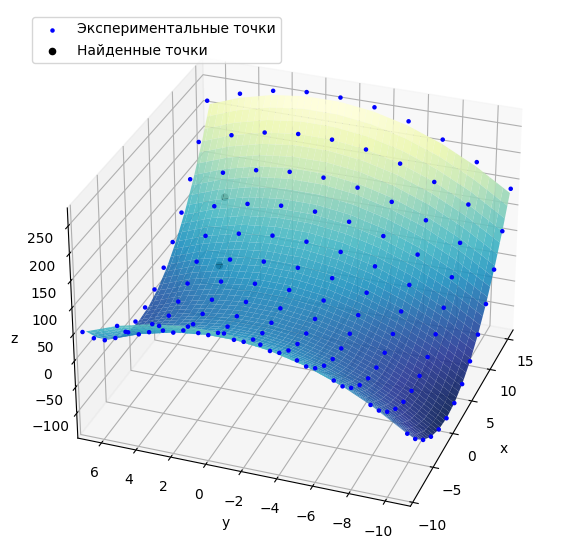

<Figure size 640x480 with 0 Axes>

In [3]:
import interpolation as inter

x = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
y = [-11, -9, -7, -5, -3, -1, 1, 3, 5, 7]
z = []
tx = [10.5, 5.5]
ty = [4.5, 3.5]
path = "./interpolation_exe"

for j in range(0, len(y)):
    z.append([])
    for i in range(0, len(x)):
        z[j].append(x[i] * x[i] - y[j] * y[j])
        
inter.bilinear_interpolation(x, y, z, tx, ty, path)

## Бикубическая интерполяция

Бикубическая интерполяция – в вычислительной математике расширение кубической интерполяции на случай функции двух переменных, значения которой заданы на двумерной регулярной сетке. Поверхность, полученная в результате бикубической интерполяции, является гладкой функцией на границах соседних квадратов, в отличие от поверхностей, полученных в резуль-тате билинейной интерполяции.

### Принцип построения бикубической интерполяции

Допустим, что необходимо интерполировать значение функции $f(x,y)$ в точке $P(x,y)$, лежащей внутри квадрата $[0,1]×[0,1]$, и известно значение функции $f$ в шестнадцати соседних точках $(i,j)$, $i=-1…2$, $j=-1…2$.
Тогда общий вид функции, задающей интерполированную поверхность, может быть записан следующим образом:

$$p(x,y)=\sum\limits_{i=0}^3\sum\limits_{j=0}^3(a_{ij} x^i y^j) \quad\quad (4.1)$$

Для нахождения коэффициентов $a_{ij}$ необходимо подставить в вышеприведённое уравнение значения функции в известных шестнадцати точках.



Например:

$$f(-1,0)=f_{-1,0}=a_{00}-a_{10}+a_{20}-a_{30}$$
$$f(0,0)=f_{0,0}=a_{00}$$
$$f(1,0)=f_{1,0}=a_{00}+a_{10}+a_{20}+a_{30}$$
$$f(2,0)=f_{2,0}=a_{00}+2{a_10}+4a_{20}+8a_{30}$$

Полностью в матричном виде:

$$Mα^T=γ^T,$$

где

$α=[a_{00}$   $a_{01}$   $a_{02}$   $a_{03}$   $a_{10}$   $a_{11}$   $a_{12}$   $a_{13}$   $a_{20}$   $a_{21}$   $a_{22}$   $a_{23}$   $a_{30}$   $a_{31}$   $a_{32}$   $a_{33}]$,

$γ=[f_{-1,-1}$  $f_{0,-1}$  $f_{1,-1}$  $f_{2,-1}$  $f_{-1,0}$  $f_{0,0}$  $f_{1,0}$  $f_{2,0}$  $f_{-1,1}$  $f_{0,1}$  $f_{1,1}$  $f_{2,1}$  $f_{-1,2}$  $f_{0,2}$  $f_{1,2}$  $f_{2,2}]$.

$$M=\left(\begin{array}{l}
1 & -1 & 1 & -1 & -1 &  1 & -1 &  1 &  1 & -1 &  1 & -1 & -1 &  1 & -1 &  1 \\
1 & -1 & 1 & -1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
1 & -1 & 1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 \\
1 & -1 & 1 & -1 &  2 & -2 &  2 & -2 &  4 & -4 &  4 & -4 &  8 & -8 &  8 & -8 \\
1 &  0 & 0 &  0 & -1 &  0 &  0 &  0 &  1 &  0 &  0 &  0 & -1 &  0 &  0 &  0 \\
1 &  0 & 0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
1 &  0 & 0 &  0 &  1 &  0 &  0 &  0 &  1 &  0 &  0 &  0 &  1 &  0 &  0 &  0 \\
1 &  0 & 0 &  0 &  2 &  0 &  0 &  0 &  4 &  0 &  0 &  0 &  8 &  0 &  0 &  0 \\
1 &  1 & 1 &  1 & -1 & -1 & -1 & -1 &  1 &  1 &  1 &  1 & -1 & -1 & -1 & -1  \\
1 &  1 & 1 &  1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0  \\
1 &  1 & 1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 &  1  \\
1 &  1 & 1 &  1 &  2 &  2 &  2 &  2 &  4 &  4 &  4 &  4 &  8 &  8 &  8 &  8 \\
1 &  2 & 4 &  8 & -1 & -2 & -4 & -8 &  1 &  2 &  4 &  8 & -1 & -2 & -4 & -8 \\
1 &  2 & 4 &  8 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
1 &  2 & 4 &  8 &  1 &  2 &  4 &  8 &  1 &  2 &  4 &  8 &  1 &  2 &  4 &  8  \\
1 &  2 & 4 &  8 &  2 &  4 &  8 & 16 &  4 &  8 & 16 & 32 &  8 & 16 & 32 & 64 \\
\end{array}\right)$$

Единожды найденные коэффициенты $a_{ij}$ могут быть использованы для многократного вычисления интерполированного значения функции в произвольных точках квадрата $[0,1]×[0,1]$.
Следует отметить, что такой способ обеспечивает непрерывность самой функции и её второй производной на границах смежных квадратов, но приводит к разрыву первых производных на границах ячеек $4×4$.

### Алгоритм

1. Ввести (считать с файла) значения сеточной функции $f(x,y)$  (массивы $x$, $y$ и $z$).
2. Для очередного сегмента $[x_i,x_{i+1}]×[y_j,y_{j+1}]$, $i=1,...,n-3$, $j=1,...,m-3$ составить систему линейных уравнений, подставив значения шестнадцати соседних точек в формулу (4.1).
3. Решить полученную СЛАУ для нахождения коэффициентов $a_{ji00}, a_{ji01}, a_{ji02}, ..., a_{ji32}$ и $a_{ji33}$.

Найденные коэффициенты $a_{jikl}$ позволят вычислить значение функции в заданной точке $(x,y)$ по формуле (4.1).

### Задание

В результате эксперимента была определена некоторая табличная зависимость $f(x,y)$. В таблице ниже на пересечении $i$-й строки и $j$-го столбца находится значение функции $f(x_i,y_j)$.

| x / y | -10 | -8 | -6 | -4 | -2 | 0 | 2 | 4 | 6 | 8 | 10 | 12 | 14 | 16 |
|-----|-----|----|----|----|----|---|---|---|---|---|---|-----|----|----|
| -11 |-21 | -57 | -85 | -105 | -117 | -121 | -117 | -105 | -85 | -57 | -21 | 23 | 75 | 135 |
| -9  | 19 | -17 | -45 | -65 | -77 | -81 | -77 | -65 | -45 | -17 | 19 | 63 | 115 | 175 |
| -7| 51 | 15 | -13 | -33 | -45 | -49 | -45 | -33 | -13 | 15 | 51 | 95 | 147 | 207 |
| -5 | 75 | 39 | 11 | -9 | -21 | -25 | -21 | -9 | 11 | 39 | 75 | 119 | 171 | 231 |
| -3 | 91 | 55 | 27 | 7 | -5 | -9 | -5 | 7 | 27 | 55 | 91 | 135 | 187 | 247 |
| -1 | 99 | 63 | 35 | 15 | 3 | -1 | 3 | 15 | 35 | 63 | 99 | 143 | 195 | 255 |
|  1 | 99 | 63 | 35 | 15 | 3 | -1 | 3 | 15 | 35 | 63 | 99 | 143 | 195 | 255 |
|  3 | 91 | 55 | 27 | 7 | -5 | -9 | -5 | 7 | 27 | 55 | 91 | 135 | 187 | 247 |
|  5 | 75 | 39 | 11 | -9 | -21 | -25 | -21 | -9 | 11 | 39 | 75 | 119 | 171 | 231 |
|  7 | 51 | 15 | -13 | -33 | -45 | -49 | -45 | -33 | -13 | 15 | 51 | 95 | 147 | 207 |

Здесь:
| x  =  | [-10, | -8, | -6, | -4, | -2, | 0, | 2, | 4, | 6, | 8, | 10, | 12, | 14, | 16] |
|-----|-----|----|----|----|----|---|---|---|---|---|---|-----|----|----|

| y  =  | [-11, | -9, | -7, | -5, | -3, | -1, | 1, | 3, | 5, | 7] |
|-----|-----|----|----|----|----|---|---|---|---|---|


Найти бикубическую интерполирующую функцию $p(x,y)$ для заданного набора точек на плоскости.
Вычислить значение функции в точках $(10.5, 4.5), (5.5, 3.5)$. Построить график, на котором изобразить эксперементальные точки, график интерполяционной зависимости, ожидаемые значения в указанных точках.

Представить результаты работы программы на тестовых данных и данных по своему варианту.

In [9]:
### Решение






### Ответы

Для запуска примера программы необходимо задать:
1. Координаты точек по осям $Ox$ и $Oy$, формирующих сетку (массивы `x` и `y`).
2. Значения сеточной функции $f(x,y)$ (массив `z`, где `z[j][i]`$=f(x_i,y_j)$).
3. Координаты точек по осям $Ox$ и $Oy$, в которых нужно вычислить значение (массивы `tx` и `ty` соответственно).
4. Команду для запуска исполняемого файла (`path = "./interpolation_exe"`).

Пример заполнения:
```python
x = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
y = [-11, -9, -7, -5, -3, -1, 1, 3, 5, 7]
z = [[-21, -57, -85, -105, -117, -121, -117, -105, -85, -57, -21, 23, 75, 135], 
     [19, -17, -45, -65, -77, -81, -77, -65, -45, -17, 19, 63, 115, 175], 
     [51, 15, -13, -33, -45, -49, -45, -33, -13, 15, 51, 95, 147, 207], 
     [75, 39, 11, -9, -21, -25, -21, -9, 11, 39, 75, 119, 171, 231], 
     [91, 55, 27, 7, -5, -9, -5, 7, 27, 55, 91, 135, 187, 247], 
     [99, 63, 35, 15, 3, -1, 3, 15, 35, 63, 99, 143, 195, 255], 
     [99, 63, 35, 15, 3, -1, 3, 15, 35, 63, 99, 143, 195, 255], 
     [91, 55, 27, 7, -5, -9, -5, 7, 27, 55, 91, 135, 187, 247], 
     [75, 39, 11, -9, -21, -25, -21, -9, 11, 39, 75, 119, 171, 231], 
     [51, 15, -13, -33, -45, -49, -45, -33, -13, 15, 51, 95, 147, 207]]
tx = [10.5, 5.5]
ty = [4.5, 3.5]
path = "./interpolation_exe"
```

Чтобы запустить пример решения, нужно импортировать модуль `interpolation`, например, так:
```python
import interpolation as inter
```
и выполнить команду:

```python
inter.bicubic_interpolation(x, y, z, tx, ty, path)
```

_______________Бикубическая интерполяция_______________

1) f(10.5, 4.5) = 90.0
Сегмент [10.0;12.0]×[3.0;5.0]
p(x,y) = 0.0*x + 0.0*x^2 + 1.0*x^3 + 0.0*x^4 +
       0.0*x*y + 0.0*x^2*y + -0.0*x^3*y + -0.0*x^4*y +
       -1.0*x*y^2 + -0.0*x^2*y^2 + 0.0*x^3*y^2 + -0.0*x^4*y^2 +
       0.0*x*y^3 + 0.0*x^2*y^3 + -0.0*x^3*y^3 + 0.0*x^4*y^3

2) f(5.5, 3.5) = 18.0
Сегмент [4.0;6.0]×[3.0;5.0]
p(x,y) = 0.0*x + 0.0*x^2 + 1.0*x^3 + 0.0*x^4 +
       0.0*x*y + 0.0*x^2*y + -0.0*x^3*y + -0.0*x^4*y +
       -1.0*x*y^2 + -0.0*x^2*y^2 + 0.0*x^3*y^2 + -0.0*x^4*y^2 +
       0.0*x*y^3 + 0.0*x^2*y^3 + -0.0*x^3*y^3 + 0.0*x^4*y^3



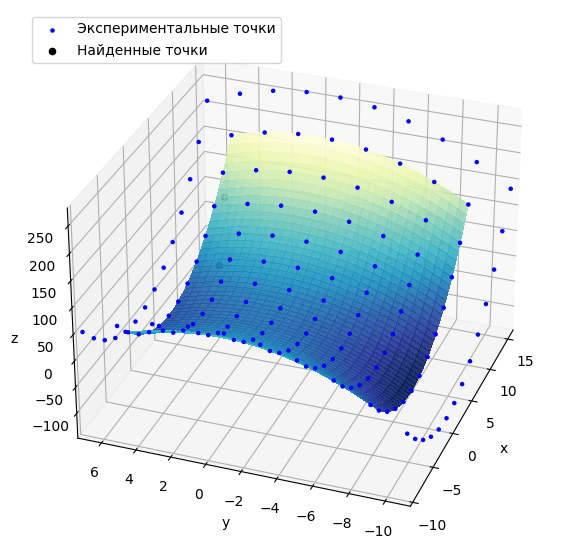

In [4]:
import interpolation as inter

x = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
y = [-11, -9, -7, -5, -3, -1, 1, 3, 5, 7]
z = []
tx = [10.5, 5.5]
ty = [4.5, 3.5]
path = "./interpolation_exe"

for j in range(0, len(y)):
    z.append([])
    for i in range(0, len(x)):
        z[j].append(x[i] * x[i] - y[j] * y[j])
        
inter.bicubic_interpolation(x, y, z, tx, ty, path)